In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
plt.style.use("ggplot")

In [2]:
df = pd.read_csv(r"C:\Users\User\Desktop\student_performance\Student_performance_data _.csv")

## Data Understanding

In [4]:
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [5]:
df.shape

(2392, 15)

In [6]:
df.columns

Index(['StudentID', 'Age', 'Gender', 'Ethnicity', 'ParentalEducation',
       'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport',
       'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GPA',
       'GradeClass'],
      dtype='object')

In [7]:
df.isnull().sum()

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

In [8]:
df.describe()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


In [9]:
df.dtypes

StudentID              int64
Age                    int64
Gender                 int64
Ethnicity              int64
ParentalEducation      int64
StudyTimeWeekly      float64
Absences               int64
Tutoring               int64
ParentalSupport        int64
Extracurricular        int64
Sports                 int64
Music                  int64
Volunteering           int64
GPA                  float64
GradeClass           float64
dtype: object

## Data Preparation

In [11]:
grades = {0: 'A', #(GPA >= 3.5)
    1: 'B', #(3.0 <= GPA < 3.5)
    2: 'C', #(2.5 <= GPA < 3.0)
    3: 'D', #(2.0 <= GPA < 2.5)
    4: 'F'} #(GPA < 2.0)

# Create a new column for letter grades using map
df["Letter_Grade"] = df["GradeClass"].map(grades)

In [12]:
# drop unnecessary columns
df.drop(["StudentID", "GPA"], axis=1, inplace=True)

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df.head()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GradeClass,Letter_Grade
0,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.0,C
1,18,0,0,1,15.408756,0,0,1,0,0,0,0,1.0,B
2,15,0,2,3,4.210570,26,0,2,0,0,0,0,4.0,F
3,17,1,0,3,10.028829,14,0,3,1,0,0,0,3.0,D
4,17,1,0,2,4.672495,17,1,3,0,0,0,0,4.0,F


## Data Visualization

### Age

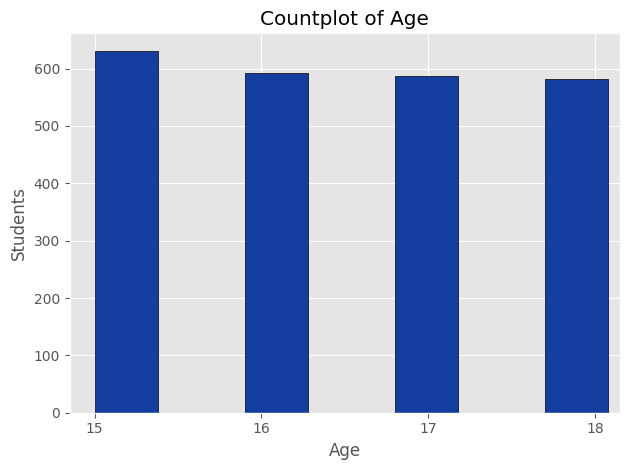

In [17]:
# plot histogram
plt.hist(df["Age"], edgecolor="Black", width=0.38, color="#133D9E")
plt.xticks([15, 16, 17, 18])
plt.title("Countplot of Age")
plt.ylabel("Students")
plt.xlabel("Age")
plt.tight_layout()
plt.show()

### Ethnicity

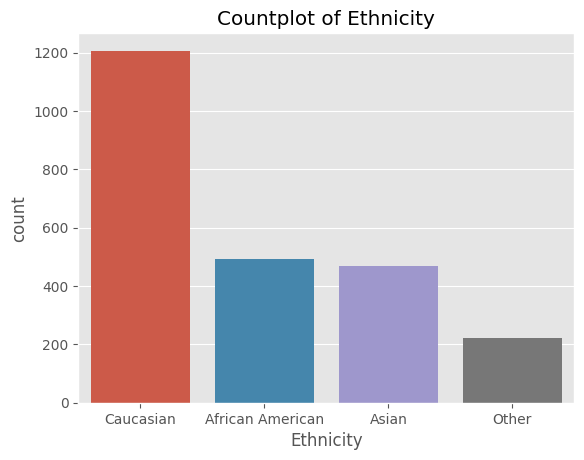

In [19]:
# plot histogram
ethnic = ['Caucasian', 'African American', 'Asian', 'Other']

sns.countplot(data=df, x="Ethnicity")
ticks = range(len(ethnic))
plt.xticks(ticks=ticks, labels = ethnic)
plt.title("Countplot of Ethnicity")
plt.show()

### Parental Education

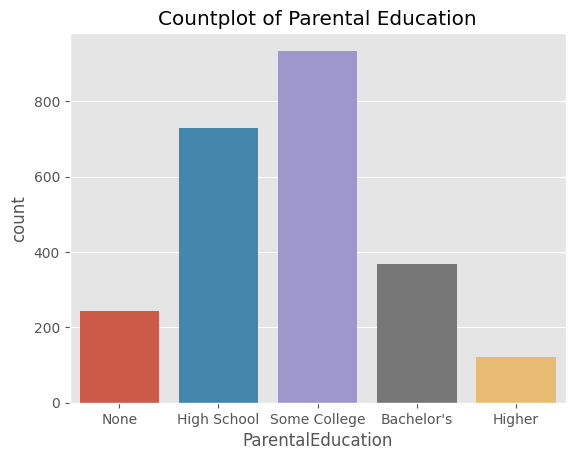

In [21]:
parent_edu = ['None', 'High School', 'Some College', 'Bachelor\'s', 'Higher']

sns.countplot(data=df, x="ParentalEducation")
ticks = range(len(parent_edu))
plt.xticks(ticks=ticks, labels=parent_edu)
plt.title("Countplot of Parental Education")
plt.show()

### Parental Support

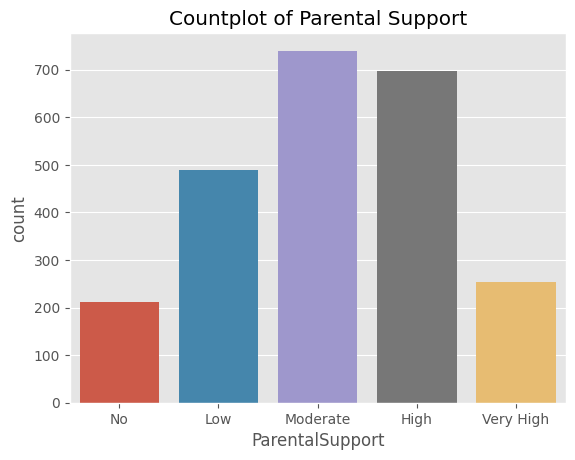

In [23]:
parent_sup = ['No', 'Low', 'Moderate', 'High', 'Very High']

sns.countplot(data=df, x="ParentalSupport")
ticks = range(len(parent_sup))
plt.xticks(ticks=ticks, labels=parent_sup)
plt.title("Countplot of Parental Support")
plt.show()

### Distribution of Study Time Weekly

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


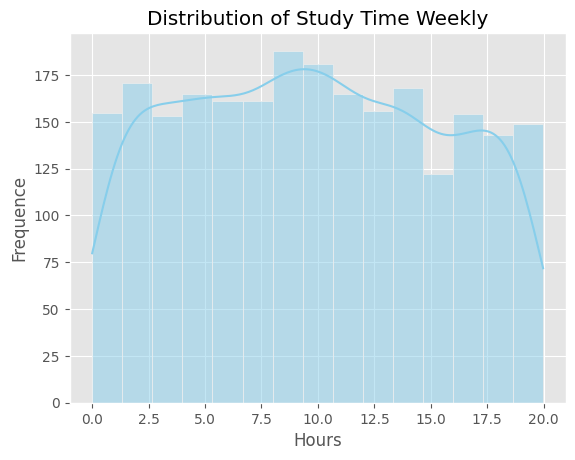

In [25]:
sns.histplot(df["StudyTimeWeekly"], kde=True, color="skyblue")
plt.title("Distribution of Study Time Weekly")
plt.xlabel("Hours")
plt.ylabel("Frequence")
plt.show()

### Distribution of Abcense

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


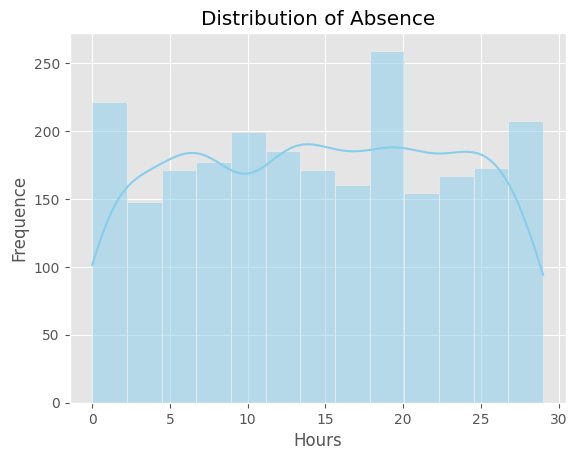

In [27]:
sns.histplot(df["Absences"], kde=True, color="skyblue")
plt.title("Distribution of Absence")
plt.xlabel("Hours")
plt.ylabel("Frequence")
plt.show()

## Correlations

In [55]:
# Select only numeric columns
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
newdf = df.select_dtypes(include=numerics)

In [87]:
df_corr = newdf.corr(method="pearson")

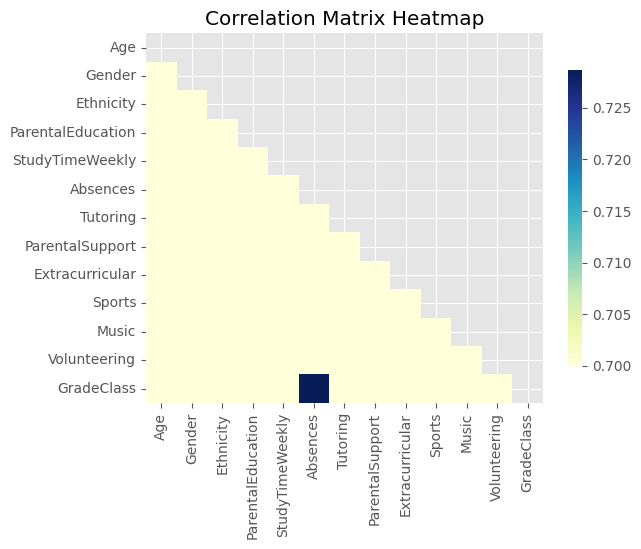

In [83]:
mask = np.triu(np.ones_like(df_corr, dtype=bool))

sns.heatmap(df_corr, mask=mask, cmap="YlGnBu",  vmin=0.7, cbar_kws={"shrink": 0.8})
plt.title("Correlation Matrix Heatmap")
plt.show()

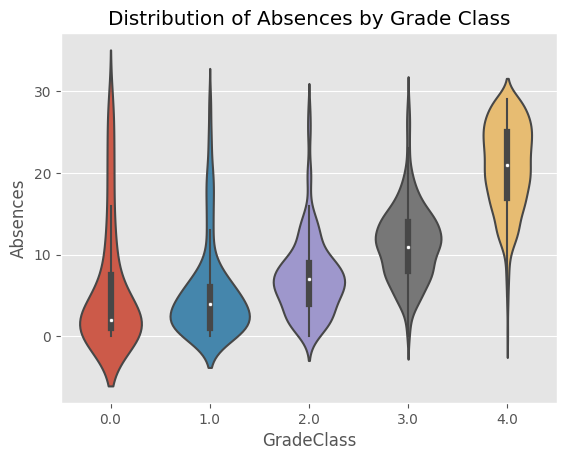

In [89]:
sns.violinplot(data=df, x='GradeClass', y='Absences')        
plt.title(f'Distribution of Absences by Grade Class')
plt.show()